<a href="https://colab.research.google.com/github/Saichandan37/pytorch-projects/blob/main/CNN2_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import torch
import torch.nn as nn
import torchvision
class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv=nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=16,kernel_size=3,stride=1,padding=2),
        nn.MaxPool2d(stride=2,kernel_size=2),
        nn.ReLU(),
        nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1),
        nn.MaxPool2d(kernel_size=2,stride=2),
        nn.ReLU()

    )
    # Calculate the input size for the linear layer
    # The output size of the last conv layer for a 28x28 input image
    # after the two conv and maxpool layers with the specified parameters
    # is 32 * 7 * 7.
    self.fc=nn.Sequential(
        nn.Dropout(0.2),
        nn.Linear(in_features=32*7*7,out_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64,out_features=10)
    )

  def forward(self,x):
    out=self.conv(x)
    out=out.view(out.size(0),-1)
    out=self.fc(out)
    return out

In [37]:
model=CNN()

In [38]:
from PIL import Image,ImageOps
from torchvision import transforms
import torch
from torch.nn import functional as F


image=Image.open('digit1.png').convert('L')
image = ImageOps.invert(image)  # <- crucial line
transform=transforms.Compose([transforms.ToTensor(),transforms.Grayscale(),
    transforms.Resize((28, 28)),transforms.Normalize((0.5,), (0.5,))])
tensor_image=transform(image).unsqueeze(0)
print(tensor_image.shape)

model.load_state_dict(torch.load("CNN_MNIST.pth"))
model.eval()
with torch.no_grad():
    output = model(tensor_image)
    probs = F.softmax(output, dim=1)
    predicted = torch.argmax(probs, dim=1)

print("Predicted Digit:", predicted.item())

for i, p in enumerate(probs[0]):
    print(f"Digit {i}: {p.item()*100:.2f}%")

torch.Size([1, 1, 28, 28])
Predicted Digit: 6
Digit 0: 0.00%
Digit 1: 0.00%
Digit 2: 0.00%
Digit 3: 0.00%
Digit 4: 0.00%
Digit 5: 0.02%
Digit 6: 99.97%
Digit 7: 0.00%
Digit 8: 0.00%
Digit 9: 0.00%


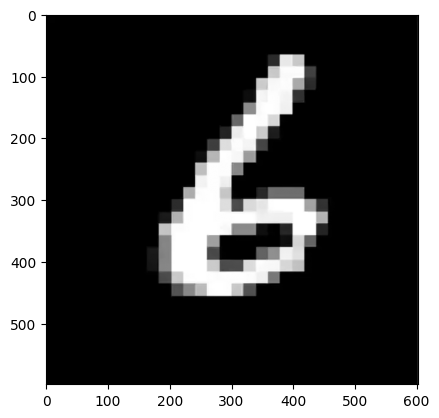

In [39]:
import matplotlib.pyplot as plt

plt.imshow(image,cmap='grey')